<a href="https://colab.research.google.com/github/MrityunjaySingh18/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [22]:
#Importing all python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotelanalysis_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Hotel Booking Analysis/Hotel Bookings.csv')

**Taking a look at data.**

In [4]:
hotelanalysis_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotelanalysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotelanalysis_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
hotelanalysis_df.shape

(119390, 32)

In [8]:
#Creating a copy of dataframe
hotelanalysis_df1 = hotelanalysis_df.copy()

In [9]:
hotelanalysis_df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [10]:
hotelanalysis_df1['is_canceled'].unique()

array([0, 1])

In [11]:
hotelanalysis_df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [12]:
hotelanalysis_df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [13]:
hotelanalysis_df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [14]:
hotelanalysis_df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [15]:
hotelanalysis_df1['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [16]:
hotelanalysis_df1['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [17]:
hotelanalysis_df1['children'].unique

<bound method Series.unique of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64>

**Cleaning Data**

Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision making. It includes removal of errors when multiple sources of data are at play.

**Step 1: Removing Duplicate Rows if any.**

In [18]:
hotelanalysis_df1[hotelanalysis_df1.duplicated()].shape

(31994, 32)

In [19]:
hotelanalysis_df1.drop_duplicates(inplace = True)

In [20]:
hotelanalysis_df1.shape

(87396, 32)

**Step 2: Handling Missing Values.**

In [21]:
#Finding Columns which have missing values
hotelanalysis_df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [23]:
hotelanalysis_df1[['company','agent']] = hotelanalysis_df1[['company','agent']].fillna(0)

In [24]:
hotelanalysis_df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [25]:
hotelanalysis_df1['children'].fillna(hotelanalysis_df1['children'].mean(),inplace = True)

In [26]:
hotelanalysis_df1['country'].fillna('others', inplace = True)

In [27]:
#Checking if all null values are removed
hotelanalysis_df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [28]:
hotelanalysis_df1[hotelanalysis_df1['adults']+hotelanalysis_df1['babies']+hotelanalysis_df1['children'] == 0].shape

(166, 32)

In [29]:
hotelanalysis_df1.drop(hotelanalysis_df1[hotelanalysis_df1['adults']+hotelanalysis_df1['babies']+hotelanalysis_df1['children'] == 0].index, inplace = True)

**Step 3: Converting columns into suitable datatypes.**

In [30]:
#Converting columns of datatype float into int.
hotelanalysis_df1[['children', 'company',  'agent']] = hotelanalysis_df1[['children', 'company', 'agent']].astype('int64')

In [31]:
#Changing the datatype of column 'reservation_status_date'
hotelanalysis_df1['reservation_status_date'] = pd.to_datetime(hotelanalysis_df1['reservation_status_date'], format = '%Y-%m-%d')

**Step 3: Adding Important Columns.**

In [32]:
#Addition of the total number of days at the hotel.
hotelanalysis_df1['ts'] = hotelanalysis_df1['stays_in_weekend_nights'] + hotelanalysis_df1['stays_in_week_nights']

#Addition of total number of people as column.
hotelanalysis_df1['tp'] = hotelanalysis_df1['adults'] + hotelanalysis_df1['children'] + hotelanalysis_df1['babies']

We add these columns in order to analyze the stay length at hotels.

**EDA**

In [33]:
numerical_df1 = hotelanalysis_df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','ts','tp']]


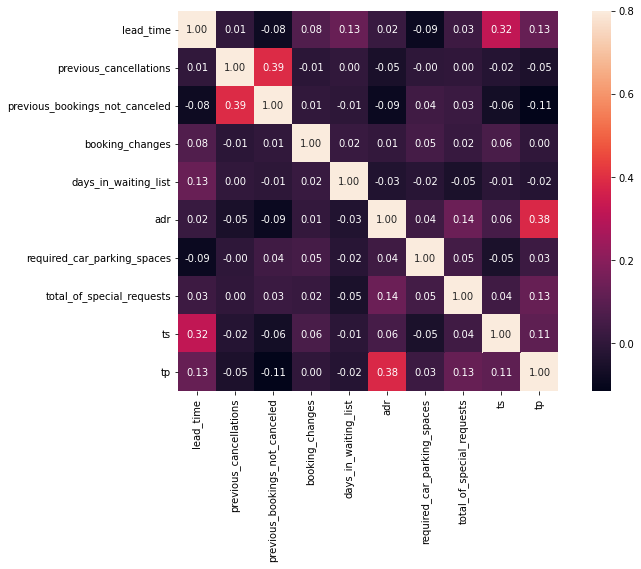

In [34]:
corrmat = numerical_df1.corr()
f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size':10}, vmax=.8, square=True);

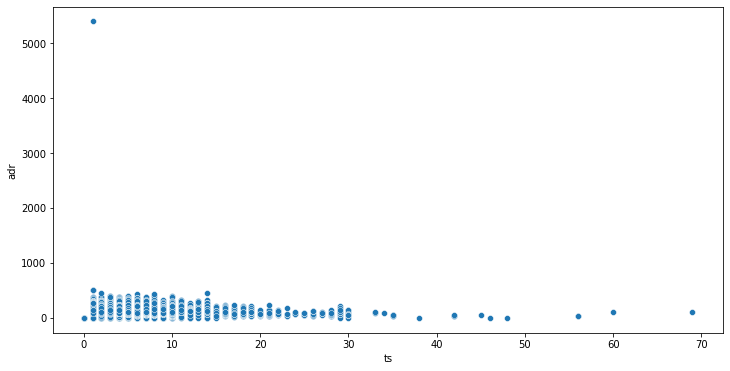

In [35]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'ts', data = hotelanalysis_df1)
plt.show()

In [36]:
hotelanalysis_df.drop(hotelanalysis_df1[hotelanalysis_df1['adr'] > 5000].index, inplace = True)


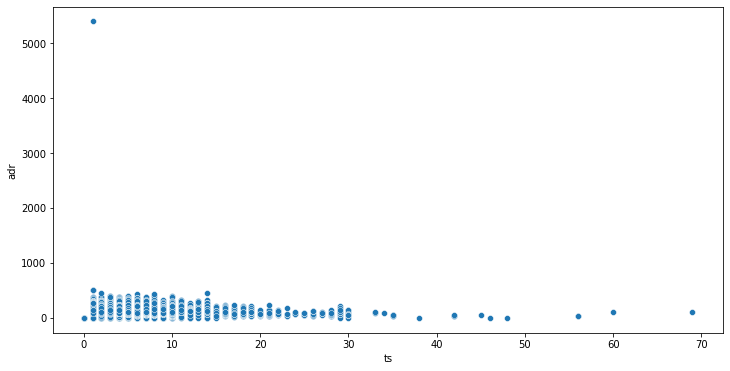

In [37]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'ts', data = hotelanalysis_df1)
plt.show()

**1) Which type of hotel is mostly prefered by the guests?**

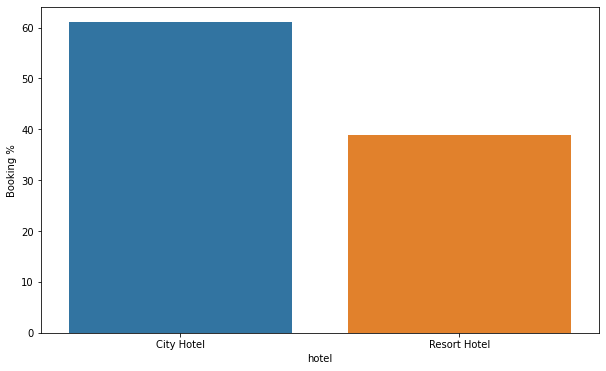

In [38]:
grouped_by_hotel = hotelanalysis_df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotelanalysis_df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      
plt.figure(figsize = (10,6))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

From the above graph, it is clear that City Hotel is more preferred by the guests than Resort Hotel.

 **2.) Which agent made the most bookings?**

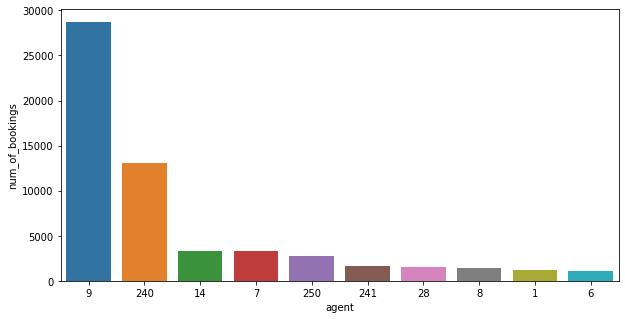

In [39]:
d1 = pd.DataFrame(hotelanalysis_df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            
d1 = d1[:10]                                                   
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

**3)What is the percentage of cancellation?**

In [41]:
data_cancelled = hotelanalysis_df1[hotelanalysis_df1['is_canceled'] == 1]
group_cancelled = data_cancelled.groupby('hotel')
item1 = pd.DataFrame(group_cancelled.size()).rename(columns = {0: 'total_cancelled_bookings'})

hotel_groups = hotelanalysis_df1.groupby('hotel')
tb = hotel_groups.size()
item2 = pd.DataFrame(tb).rename(columns = {0: 'tb'})
item3 = pd.concat([item1, item2], axis=1)

item3['cancel_%'] = round((item3['total_cancelled_bookings']/item3['tb'])*100,2)
item3


,total_cancelled_bookings,tb,cancel_%
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


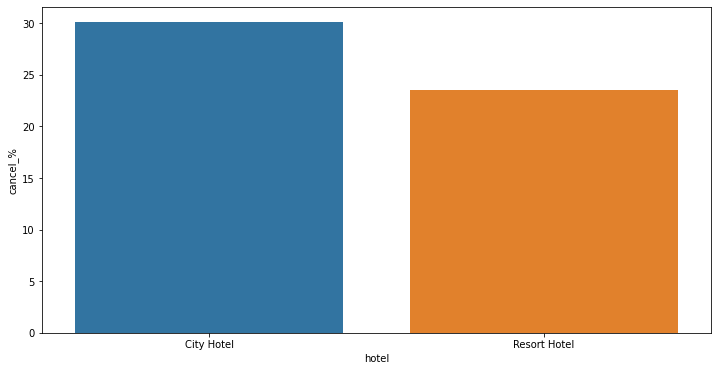

In [42]:
plt.figure(figsize = (12,6))
sns.barplot(x = item3.index, y = item3['cancel_%'])
plt.show()

Close to 30% of City Hotel reservations have been cancelled.

**4.) What is the percentage of repeated guests?**

In [44]:
data_repeatation = hotelanalysis_df1[hotelanalysis_df1['is_repeated_guest'] == 1]
group_repeatation = data_repeatation.groupby('hotel')
item1 = pd.DataFrame(group_repeatation.size()).rename(columns = {0:'total_repeated_guests'})

tb = hotel_groups.size()
item2 = pd.DataFrame(tb).rename(columns = {0: 'tb'})
item3 = pd.concat([item1, item2], axis=1)

item3['repeat_%'] = round((item3['total_repeated_guests']/item3['tb'])*100,2)
item3

,total_repeated_guests,tb,repeat_%
hotel,,,
City Hotel,1657,53274,3.11
Resort Hotel,1707,33956,5.03


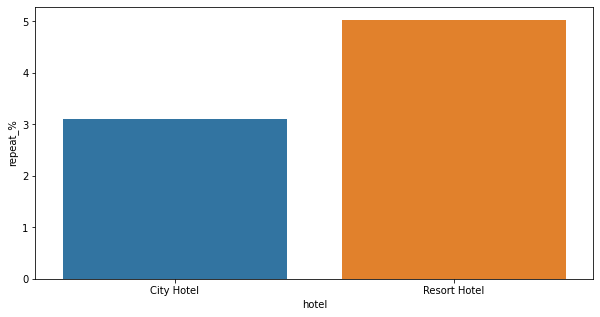

In [45]:
plt.figure(figsize = (10,5))
sns.barplot(x = item3.index, y = item3['repeat_%'])
plt.show()

So, from the above analysis, it is clear that nearly 3% repeated guests are coming at City Hotel and nearly 5% repeated guests are coming at Resort Hotel.